In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('datos_procesados.csv')

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Categoría de Edad
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Adulto mayor
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adulto
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Adulto mayor
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adulto
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Adulto mayor


# Parte 1

In [10]:
limpio = df.drop(columns=['Categoría de Edad'])

In [14]:
class_map =  {0: 'vivos', 1: 'muertos'}
limpio['DEATH_EVENT'] = limpio['DEATH_EVENT'].map(class_map)

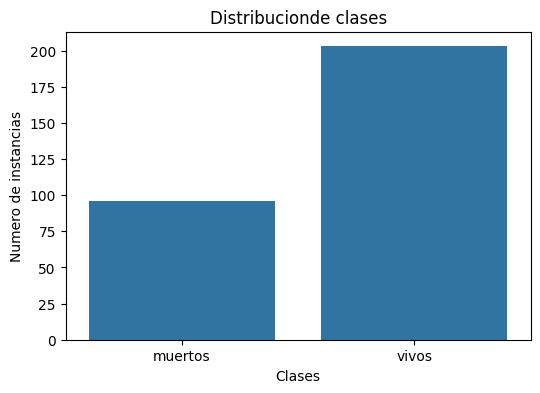

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=limpio)
plt.title('Distribucionde clases')
plt.xlabel('Clases')
plt.ylabel('Numero de instancias')
plt.show()

# Parte 2

In [20]:
X = limpio.drop('DEATH_EVENT', axis=1)
y = limpio['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Ahora X_train y y_train son los datos de entrenamiento, y X_test e y_test son los datos de prueba

# Parte 3

In [21]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [22]:
print(f'Conjunto de prueba: {acc:.2f}')

Conjunto de prueba: 0.83


# Parte 12: Clasificación 2

In [25]:
random_forest = RandomForestClassifier(random_state=42)

# Ajustar el modelo con el conjunto de entrenamiento
random_forest.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
#2
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [26]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.87

Confusion Matrix:
 [[16  3]
 [ 5 36]]

Classification Report:
               precision    recall  f1-score   support

     muertos       0.76      0.84      0.80        19
       vivos       0.92      0.88      0.90        41

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
"""No, el accuracy no captura completamente el rendimiento del modelo,
especialmente cuando las clases están desbalanceadas.
Es necesario considerar métricas adicionales como el F1-Score
para evaluar de manera más completa la capacidad predictiva del modelo."""

In [38]:
# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# Calcula el F1-Score
f1 = f1_score(y_test, y_pred, pos_label='muertos')
print('F1-Score:', f1)


Accuracy: 0.8666666666666667
F1-Score: 0.8
